## Load data

In [1]:
from tensorflow.keras.datasets import boston_housing

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split=0.2)

65536/57026 [==================================] - 0s 0us/step


In [3]:
X_train.shape

(404, 13)

In [4]:
y_train.shape

(404,)

In [5]:
X_test.shape

(102, 13)

In [6]:
y_test.shape

(102,)

In [7]:
X_train[0:3, :]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [8]:
y_train[0:3]

array([15.2, 42.3, 50. ])

In [9]:
import matplotlib.pyplot as plt

(array([ 15.,  48.,  72., 120.,  64.,  31.,  21.,   8.,   8.,  17.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

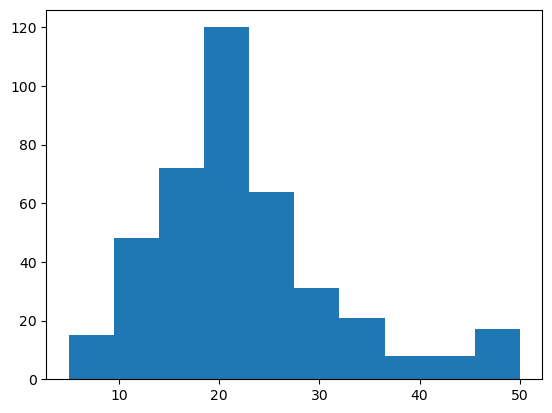

In [10]:
plt.hist(y_train)

(array([ 8.,  7., 13., 33., 18.,  8.,  9.,  0.,  2.,  4.]),
 array([ 5.6 , 10.04, 14.48, 18.92, 23.36, 27.8 , 32.24, 36.68, 41.12,
        45.56, 50.  ]),
 <BarContainer object of 10 artists>)

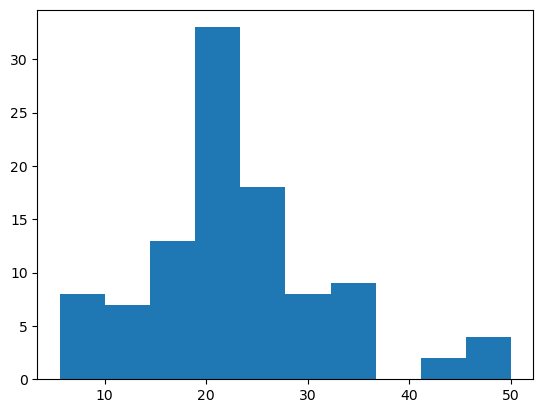

In [11]:
plt.hist(y_test)

In [12]:
from sklearn.preprocessing import scale

In [15]:
X_train = scale(X_train)
X_test = scale(X_test)

In [16]:
X_train[:3, :]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006]])

In [156]:
import numpy as np

import tensorflow as tf


tf.random.set_seed(23)
np.random.seed(23)

In [157]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(13, )))
model.add(tf.keras.layers.Dense(1, activation="linear"))

model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=tf.keras.metrics.mean_squared_error)

In [158]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [159]:
epochs = 400

history = model.fit(X_train,
                    y_train,
                    batch_size=None,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/400
11/11 [==============================] - 0s 13ms/step - loss: 315.0207 - mean_squared_error: 315.0207 - val_loss: 111.1850 - val_mean_squared_error: 111.1850
Epoch 2/400
11/11 [==============================] - 0s 4ms/step - loss: 73.9429 - mean_squared_error: 73.9429 - val_loss: 35.6836 - val_mean_squared_error: 35.6836
Epoch 3/400
11/11 [==============================] - 0s 5ms/step - loss: 32.5606 - mean_squared_error: 32.5606 - val_loss: 27.4245 - val_mean_squared_error: 27.4245
Epoch 4/400
11/11 [==============================] - 0s 5ms/step - loss: 24.2635 - mean_squared_error: 24.2635 - val_loss: 22.9879 - val_mean_squared_error: 22.9879
Epoch 5/400
11/11 [==============================] - 0s 4ms/step - loss: 19.8287 - mean_squared_error: 19.8287 - val_loss: 19.1559 - val_mean_squared_error: 19.1559
Epoch 6/400
11/11 [==============================] - 0s 4ms/step - loss: 16.8922 - mean_squared_error: 16.8922 - val_loss: 19.4121 - val_mean_squared_error: 19.4121
Epoch

In [160]:
model.evaluate(X_test,
               y_test)


4/4 [==============================] - 0s 2ms/step - loss: 12.4772 - mean_squared_error: 12.4772


[12.477209091186523, 12.477209091186523]

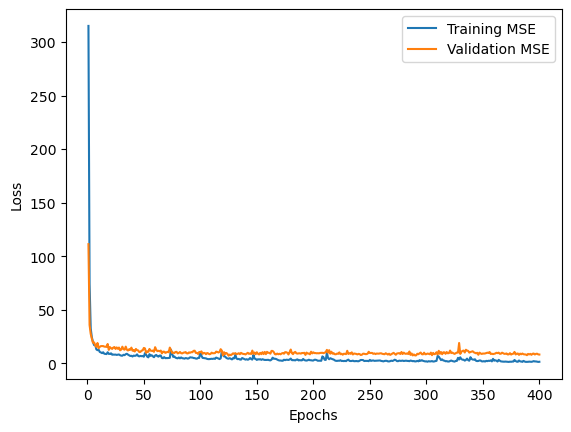

In [161]:
epochs = range(1, len(history.history["mean_squared_error"])+1)

plt.plot(epochs, history.history["mean_squared_error"],
         label='Training MSE')
plt.plot(epochs, history.history["val_mean_squared_error"],
         label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

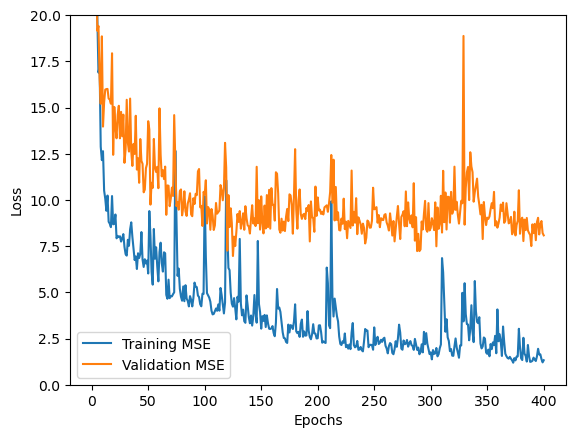

In [169]:
epochs = range(1, len(history.history["mean_squared_error"])+1)

plt.plot(epochs, history.history["mean_squared_error"],
         label='Training MSE')
plt.plot(epochs, history.history["val_mean_squared_error"],
         label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.ylim(0, 20)

plt.show()


In [170]:
X_first_test = X_test[0, :]
X_first_test = X_first_test.reshape(1, 13)

In [171]:
model.predict(X_first_test)

array([[7.214391]], dtype=float32)

In [172]:
model.save("../models/tf_reg/tf_reg_128.model")

INFO:tensorflow:Assets written to: ../models/tf_reg/tf_reg_128.model/assets
